# Architecture analysis at module scale

## 0. Module Requierement

### 0.1. import standard python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 0.2. import strawberry modules

In [2]:
import openalea.strawberry #import openalea.strawberry module
from openalea.strawberry.Import_mtgfile import import_mtgfile
from openalea.strawberry.Import_mtgfile import plant_number_by_varieties
from openalea.strawberry.variables import extract_at_module_scale
from openalea.strawberry.analysis import occurence_module_order_along_time, pointwisemean_plot, crowntype_distribution

In [3]:
# config
pd.set_option('display.multi_sparse', False)

## 1. Import  and read mtg files

* Import and read mtg file for each varieties

In [4]:
Gariguette = import_mtgfile(filename= "Gariguette")
Capriss = import_mtgfile(filename = "Capriss")
Darselect = import_mtgfile(filename = "Darselect")
Cir107 = import_mtgfile(filename = "Cir107")
Ciflorette = import_mtgfile(filename = "Ciflorette")
Clery = import_mtgfile(filename="Clery")

* Import and read mtg for the varities Gariguette and Capriss in the single big mtg file

In [5]:
All_varieties = import_mtgfile(filename=["Gariguette","Capriss","Darselect","Cir107","Ciflorette", "Clery"])
plant_number_by_varieties(All_varieties)

Ciflorette : 54 plants
Darselect : 54 plants
Gariguette : 54 plants
Capriss : 54 plants
Clery : 54 plants
Cir107 : 54 plants


## 2. Extraction of data at module scale

To study plant development at module scale you must extract data at module scale.  
For this you use *variable.extract_at_module_scale* function

* **Example with Gariguette**

In [6]:
Gariguette_extraction_at_module_scale = extract_at_module_scale(Gariguette)
Gariguette_extraction_at_module_scale
Gariguette_extraction_at_module_scale.sort_values(["date","plant","order"],ascending=[True,True,True])

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
2,Gariguette,2014/12/10,A,1,0,8,4,12,0,0,0,1,3,7,1,1,3,False,2,1
37,Gariguette,2014/12/10,A,2,0,8,4,12,0,0,0,4,3,4,1,1,3,False,74,73
67,Gariguette,2014/12/10,A,3,0,11,3,14,0,0,0,3,1,8,2,1,3,False,147,146
125,Gariguette,2014/12/10,A,4,0,8,3,11,0,0,0,6,0,5,0,1,3,False,264,263
154,Gariguette,2014/12/10,A,5,0,6,4,10,0,0,0,5,2,2,1,1,3,False,327,326
181,Gariguette,2014/12/10,A,6,0,7,4,11,0,0,0,3,2,5,1,1,3,False,383,382
209,Gariguette,2014/12/10,A,7,0,7,4,11,0,0,0,7,1,2,1,1,3,False,445,444
236,Gariguette,2014/12/10,A,8,0,6,3,9,0,0,0,1,3,4,1,1,3,False,505,504
25,Gariguette,2014/12/10,A,9,0,7,3,10,0,0,0,4,0,5,1,1,3,False,562,561
59,Gariguette,2015/01/08,A,1,0,11,8,19,0,0,0,3,2,10,1,1,3,False,636,635


* **Example with Capriss**

In [7]:
Capriss_extraction_at_module_scale = extract_at_module_scale(Capriss)
Capriss_extraction_at_module_scale
Capriss_extraction_at_module_scale.sort_values(["date","plant","order"],ascending=[True,True,True])

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
0,Capriss,2014/12/10,A,1,0,11,3,14,0,0,0,1,1,9,2,1,3,False,2,1
21,Capriss,2014/12/10,A,2,0,8,3,11,0,0,0,5,0,3,2,1,3,False,121,120
22,Capriss,2014/12/10,A,2,1,2,3,5,0,0,0,5,0,0,0,3,3,False,123,120
39,Capriss,2014/12/10,A,3,0,6,2,8,0,0,0,3,1,3,1,1,3,False,213,212
54,Capriss,2014/12/10,A,4,0,8,2,10,0,0,0,3,2,3,2,1,3,False,267,266
3,Capriss,2014/12/10,A,5,0,8,2,10,0,0,0,0,2,7,1,1,3,False,345,344
119,Capriss,2014/12/10,A,6,0,9,2,11,0,0,0,2,2,6,1,1,3,False,440,439
102,Capriss,2014/12/10,A,7,0,8,2,10,0,0,0,4,0,4,1,1,3,False,528,527
122,Capriss,2014/12/10,A,8,0,6,2,8,0,0,0,3,1,3,1,1,3,False,608,607
135,Capriss,2014/12/10,A,9,0,8,2,10,0,0,0,1,1,6,1,1,3,False,673,672


* **Darselect**

In [8]:
Darselect_extraction_at_module_scale = extract_at_module_scale(Darselect)
Darselect_extraction_at_module_scale

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
0,Darselect,2015/01/09,A,2,1,3,1,4,0,0,0,1,2,1,0,2,3,False,512,463
1,Darselect,2014/12/10,A,1,0,5,0,5,0,0,7,1,0,0,2,1,4,True,2,1
2,Darselect,2015/03/06,A,8,3,1,2,3,0,0,0,1,1,0,0,2,3,False,2052,2016
3,Darselect,2015/01/09,A,4,1,2,1,3,0,0,0,1,1,1,0,2,3,False,598,580
4,Darselect,2015/04/03,A,9,2,2,0,2,3,0,5,1,0,0,0,2,4,True,3080,3038
5,Darselect,2015/04/03,A,4,1,4,0,4,13,0,13,1,0,2,0,2,4,True,2569,2517
6,Darselect,2015/04/03,A,9,1,4,0,4,9,0,9,0,0,0,0,3,4,True,3069,3038
7,Darselect,2015/04/03,A,9,3,2,1,3,0,0,0,2,0,1,0,2,3,False,3085,3038
8,Darselect,2015/02/11,A,2,1,2,0,2,0,0,0,0,0,2,0,2,4,True,1040,997
9,Darselect,2014/12/10,A,1,1,2,2,4,0,0,0,2,0,2,0,2,3,False,17,1


* **Cir107**

In [9]:
Cir107_extraction_at_module_scale = extract_at_module_scale(Cir107)
Cir107_extraction_at_module_scale

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
0,Cir107,2014/12/10,A,1,0,8,2,10,0,0,0,2,0,6,2,1,3,False,2,1
1,Cir107,2015/02/11,A,6,1,2,0,2,0,0,9,0,0,2,0,2,4,True,2731,2613
2,Cir107,2015/02/11,A,2,2,1,1,2,0,0,0,1,0,1,0,2,4,True,2054,2007
3,Cir107,2015/05/20,A,2,1,3,0,3,4,0,6,0,0,0,0,3,4,True,6161,6149
4,Cir107,2015/03/04,A,7,2,2,0,2,0,0,5,1,0,1,0,2,4,True,4115,4024
5,Cir107,2015/02/11,A,2,1,6,0,6,0,0,9,4,1,0,0,3,4,True,2072,2007
6,Cir107,2015/05/20,A,2,2,4,0,4,4,0,7,3,0,0,0,2,4,True,6169,6149
7,Cir107,2015/05/20,A,3,1,2,0,2,7,0,8,1,0,0,0,2,4,True,6490,6325
8,Cir107,2015/05/20,A,2,3,1,1,2,0,0,0,1,0,0,1,2,3,False,6180,6149
9,Cir107,2015/05/20,A,2,0,12,0,12,17,0,20,0,0,0,2,1,4,True,6150,6149


* **Ciflorette**

In [10]:
Ciflorette_extraction_at_module_scale = extract_at_module_scale(Ciflorette)
Ciflorette_extraction_at_module_scale

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
0,Ciflorette,2015/05/27,A,9,1,3,0,3,6,0,6,0,0,1,0,2,4,True,6342,6279
1,Ciflorette,2015/05/27,A,7,3,2,0,2,9,0,9,1,0,0,1,2,4,True,5984,5956
2,Ciflorette,2014/12/04,A,1,0,4,0,4,0,0,1,0,0,0,3,1,4,True,2,1
3,Ciflorette,2015/02/13,A,5,1,3,1,4,0,0,6,1,1,2,0,2,4,True,2051,1955
4,Ciflorette,2015/05/27,A,6,3,3,0,3,4,0,6,1,0,0,1,2,4,True,5933,5804
5,Ciflorette,2015/02/13,A,1,1,4,0,4,0,0,8,2,0,2,0,2,4,True,1543,1422
6,Ciflorette,2015/05/27,A,8,1,2,0,2,7,0,7,0,0,1,0,3,4,True,6153,6144
7,Ciflorette,2015/05/27,A,3,1,2,0,2,4,0,4,0,0,1,0,2,4,True,5524,5405
8,Ciflorette,2015/05/27,A,1,3,3,0,3,2,0,4,2,0,0,1,2,4,True,5131,4926
9,Ciflorette,2015/03/30,A,3,2,3,0,3,2,0,6,0,0,3,0,2,4,True,4108,4025


* **Clery**

In [11]:
Clery_extraction_at_module_scale = extract_at_module_scale(Clery)
Clery_extraction_at_module_scale

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
0,Clery,2015/05/27,A,6,2,4,0,4,0,0,4,2,0,0,0,2,4,True,5121,5071
1,Clery,2014/12/10,A,1,0,11,2,13,0,0,0,1,0,8,3,1,3,False,2,1
2,Clery,2015/03/02,A,8,2,1,2,3,0,0,0,2,0,1,0,2,3,False,3075,3011
3,Clery,2015/05/27,A,4,3,2,0,2,0,0,0,0,0,0,0,3,4,True,4859,4818
4,Clery,2015/04/03,A,7,2,3,0,3,1,0,7,1,0,2,0,2,4,True,4104,3948
5,Clery,2015/02/15,A,2,1,2,0,2,0,0,0,0,0,2,0,2,4,True,1545,1494
6,Clery,2015/05/27,A,6,3,1,2,3,0,0,0,1,0,0,2,2,3,False,5132,5071
7,Clery,2015/04/03,A,3,2,2,2,4,0,0,0,2,0,1,0,2,3,False,3597,3478
8,Clery,2015/02/15,A,1,1,4,0,4,0,0,0,2,0,2,0,2,4,True,1453,1377
9,Clery,2015/05/27,A,2,3,3,0,3,1,0,4,1,1,1,0,2,4,True,4644,4516


* **Exemple of big mtg (All varieties) extraction at module scale**

In [12]:
All_varieties_extraction_at_module_scale = extract_at_module_scale(All_varieties)
All_varieties_extraction_at_module_scale

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
0,Darselect,2015/03/06,A,3,3,1,2,3,0,0,0,3,0,0,0,2,3,False,8192,8132
1,Ciflorette,2014/12/04,A,1,0,4,0,4,0,0,1,0,0,0,3,1,4,True,2,1
2,Capriss,2015/05/27,A,9,1,5,0,5,3,0,3,2,0,2,0,3,4,True,24580,24496
3,Ciflorette,2014/12/04,A,1,1,3,2,5,0,0,0,3,1,1,0,2,3,False,13,1
4,Darselect,2015/03/06,A,4,0,4,0,4,9,0,9,0,0,3,0,1,4,True,8207,8206
5,Cir107,2015/02/11,A,5,2,1,1,2,0,0,0,1,0,1,0,2,4,True,32786,32751
6,Capriss,2015/05/27,A,9,2,4,0,4,4,0,4,1,0,3,0,2,4,True,24598,24496
7,Cir107,2015/02/11,A,5,1,7,0,7,0,0,14,3,1,2,0,3,4,True,32800,32751
8,Darselect,2015/03/06,A,4,1,4,0,4,4,0,11,2,0,1,0,2,4,True,8228,8206
9,Cir107,2015/05/20,A,4,1,4,0,4,11,0,12,0,0,0,0,3,4,True,36871,36818


## 3. Exploratory data analysis at module scale

Exploratory analysis analysis at module scale consisted in comparing the frequency distribution of five main variables:  
    1. Occurence of successive module orders along time
    2. Number of leaves by module orders
    3. Number of flowers  by module orders
    4. Number of stolons by module orders
    5. Type of crown (extension crown vs branch crown) by module orders
    6. Complete vs incomplete modules by modules orders

### 3.1. Occurence of the successive module orders along time

* **For Gariguette varieties**

In [13]:
Gariguette_frequency = occurence_module_order_along_time(data= Gariguette_extraction_at_module_scale,frequency_type= "cdf")
Gariguette_frequency

date,2014/12/10,2015/01/08,2015/02/12,2015/03/06,2015/04/02,2015/05/19
order,,,,,,
0,1.0,0.5625,0.272727,0.236842,0.136364,0.113924
1,1.0,1.0000,1.000000,0.684211,0.530303,0.367089
2,1.0,1.0000,1.000000,0.973684,0.954545,0.658228
3,1.0,1.0000,1.000000,1.000000,1.000000,0.873418
4,1.0,1.0000,1.000000,1.000000,1.000000,0.987342
5,1.0,1.0000,1.000000,1.000000,1.000000,1.000000


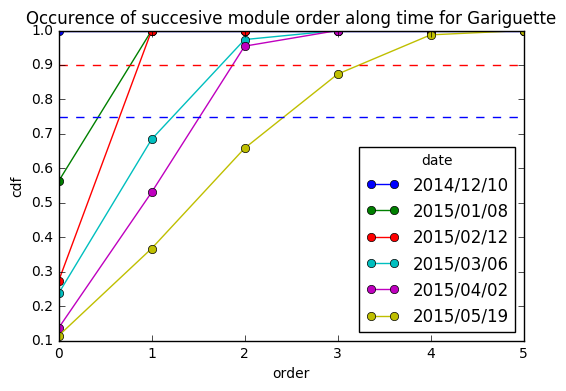

In [14]:
Gariguette_frequency.plot.line(marker = "o")
plt.axhline(y = 0.9, color = "r",linestyle="--") # threshold at 0.9 quartile, 
plt.axhline(y = 0.75, color = "b",linestyle="--") # threshold at 0.75 quartile
plt.title("Occurence of succesive module order along time for Gariguette")
plt.ylabel("cdf")

* **For Capriss varieties**

In [15]:
Capriss_frequency = occurence_module_order_along_time(data= Capriss_extraction_at_module_scale,frequency_type= "cdf")
Capriss_frequency

date,2014/12/10,2015/01/07,2015/02/15,2015/03/02,2015/04/03,2015/05/27
order,,,,,,
0,0.818182,0.264706,0.166667,0.138462,0.098901,0.071429
1,1.000000,0.970588,0.870370,0.738462,0.582418,0.412698
2,1.000000,1.000000,1.000000,1.000000,0.989011,0.730159
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.968254
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


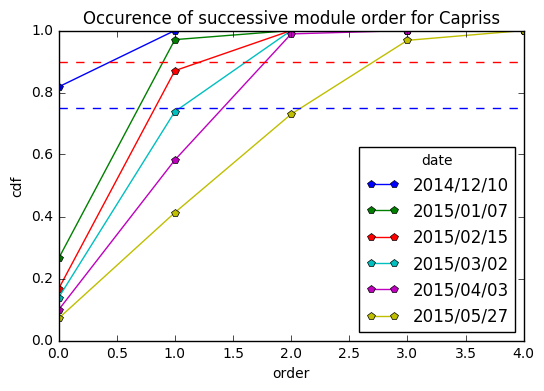

In [16]:
Capriss_frequency.plot.line(marker = "p")
plt.axhline(y = 0.9, color = "r",linestyle="--") # threshold at 0.9 quartile, 
plt.axhline(y = 0.75, color = "b",linestyle="--") # threshold at 0.75 quartile
plt.title("Occurence of successive module order for Capriss")
plt.ylabel("cdf")

* ** For Darselect variety**

In [17]:
Darselect_frequency = occurence_module_order_along_time(data= Darselect_extraction_at_module_scale,frequency_type= "cdf")
Darselect_frequency

date,2014/12/10,2015/01/09,2015/02/11,2015/03/06,2015/04/03,2015/05/20
order,,,,,,
0,0.6,0.45,0.310345,0.236842,0.136364,0.115385
1,1.0,1.00,0.896552,0.631579,0.439394,0.346154
2,1.0,1.00,1.000000,0.894737,0.742424,0.653846
3,1.0,1.00,1.000000,1.000000,1.000000,0.884615
4,1.0,1.00,1.000000,1.000000,1.000000,0.987179
5,1.0,1.00,1.000000,1.000000,1.000000,1.000000


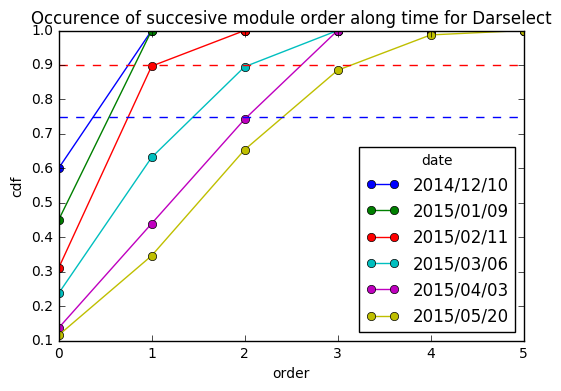

In [18]:
Darselect_frequency.plot.line(marker = "o")
plt.axhline(y = 0.9, color = "r",linestyle="--") # threshold at 0.9 quartile, 
plt.axhline(y = 0.75, color = "b",linestyle="--") # threshold at 0.75 quartile
plt.title("Occurence of succesive module order along time for Darselect")
plt.ylabel("cdf")

* ** For Cir107 Variety**

In [19]:
Cir107_frequency = occurence_module_order_along_time(data= Cir107_extraction_at_module_scale,frequency_type= "cdf")
Cir107_frequency

date,2014/12/10,2015/01/08,2015/02/11,2015/03/04,2015/04/02,2015/05/20
order,,,,,,
0,0.642857,0.310345,0.157895,0.123288,0.116883,0.076923
1,1.000000,0.896552,0.736842,0.575342,0.519481,0.376068
2,1.000000,1.000000,0.982456,0.958904,0.909091,0.675214
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.931624
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


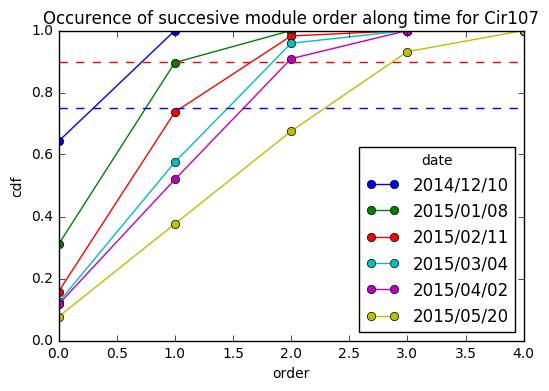

In [20]:
Cir107_frequency.plot.line(marker = "o")
plt.axhline(y = 0.9, color = "r",linestyle="--") # threshold at 0.9 quartile, 
plt.axhline(y = 0.75, color = "b",linestyle="--") # threshold at 0.75 quartile
plt.title("Occurence of succesive module order along time for Cir107")
plt.ylabel("cdf")

* **For Ciflorette variety **

In [21]:
Ciflorette_frequency = occurence_module_order_along_time(data= Ciflorette_extraction_at_module_scale,frequency_type= "cdf")
Ciflorette_frequency

date,2014/12/04,2015/01/07,2015/02/13,2015/03/02,2015/03/30,2015/05/27
order,,,,,,
0,0.692308,0.642857,0.195652,0.18,0.132353,0.084112
1,1.000000,1.000000,0.847826,0.68,0.529412,0.308411
2,1.000000,1.000000,1.000000,0.98,0.955882,0.560748
3,1.000000,1.000000,1.000000,1.00,1.000000,0.813084
4,1.000000,1.000000,1.000000,1.00,1.000000,0.971963
5,1.000000,1.000000,1.000000,1.00,1.000000,1.000000


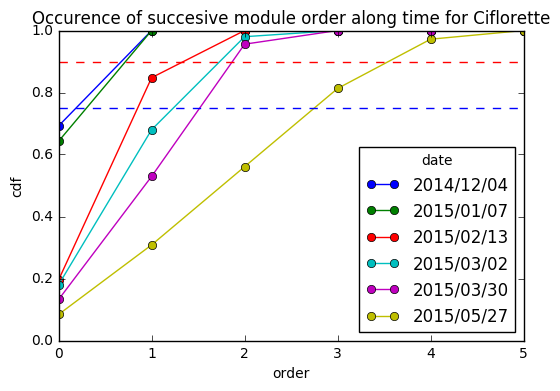

In [22]:
Ciflorette_frequency.plot.line(marker = "o")
plt.axhline(y = 0.9, color = "r",linestyle="--") # threshold at 0.9 quartile, 
plt.axhline(y = 0.75, color = "b",linestyle="--") # threshold at 0.75 quartile
plt.title("Occurence of succesive module order along time for Ciflorette")
plt.ylabel("cdf")

* **For Clery variety**

In [23]:
Clery_frequency = occurence_module_order_along_time(data= Clery_extraction_at_module_scale,frequency_type= "cdf")
Clery_frequency

date,2014/12/10,2015/01/07,2015/02/15,2015/03/02,2015/04/03,2015/05/27
order,,,,,,
0,0.818182,0.473684,0.310345,0.236842,0.138462,0.089109
1,1.000000,1.000000,1.000000,0.789474,0.507692,0.297030
2,1.000000,1.000000,1.000000,0.973684,0.923077,0.584158
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.861386
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


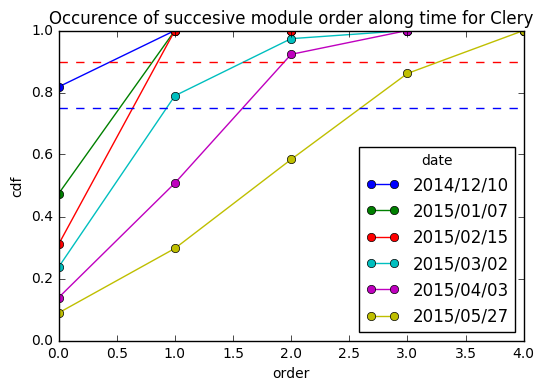

In [24]:
Clery_frequency.plot.line(marker = "o")
plt.axhline(y = 0.9, color = "r",linestyle="--") # threshold at 0.9 quartile, 
plt.axhline(y = 0.75, color = "b",linestyle="--") # threshold at 0.75 quartile
plt.title("Occurence of succesive module order along time for Clery")
plt.ylabel("cdf")

### 3.2 Pointwise mean no. Leaves, Flowers, Stolon by module order

The first step is calcul mean and standard deviation for each variable by genotype and order

In [25]:
Mean= All_varieties_extraction_at_module_scale.groupby(["Genotype", "order"]).mean()
sd= All_varieties_extraction_at_module_scale.groupby(["Genotype", "order"]).std()

#### 3.2.1 Pointwise mean no. leaves by module order and génotype

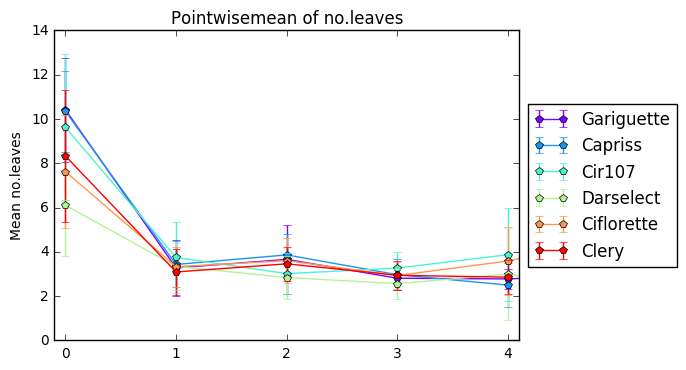

In [26]:
pointwisemean_plot(data_mean=Mean,
                   data_sd=sd,
                   varieties=["Gariguette","Capriss","Cir107","Darselect","Ciflorette", "Clery"], 
                   variable='nb_total_leaves',
                   title= "Pointwisemean of no.leaves",
                   ylab="Mean no.leaves",
                   expand= 0.1)

#### 3.2.2 Pointwise mean of no. total flowers by genotype and orders

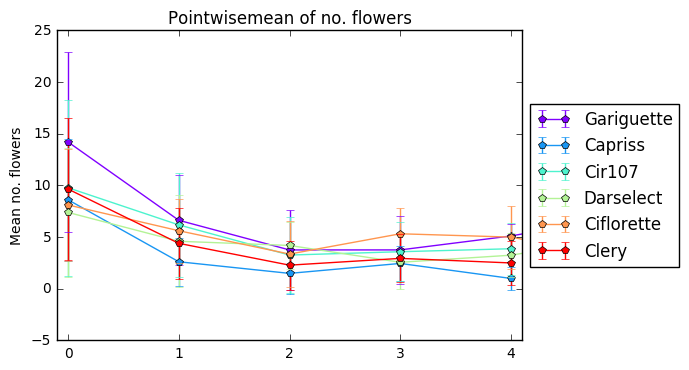

In [27]:
pointwisemean_plot(data_mean=Mean,
                   data_sd=sd,
                   varieties=["Gariguette","Capriss","Cir107","Darselect","Ciflorette", "Clery"], 
                   variable='nb_total_flowers',
                   title= "Pointwisemean of no. flowers",
                   ylab="Mean no. flowers",
                   expand= 0.1)

### 3.4 Number of stolons by module orders

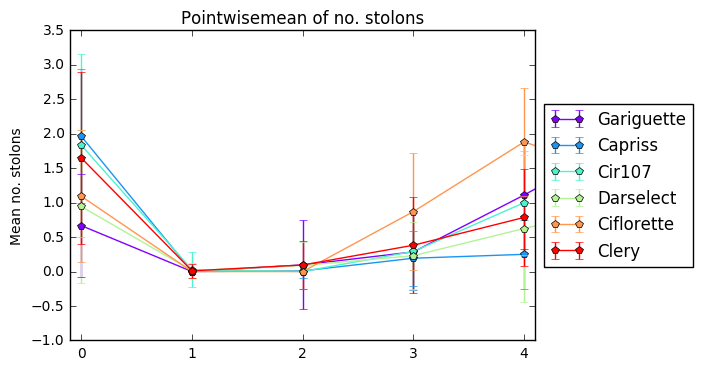

In [28]:
pointwisemean_plot(data_mean=Mean,
                   data_sd=sd,
                   varieties=["Gariguette","Capriss","Cir107","Darselect","Ciflorette", "Clery"], 
                   variable='nb_stolons',
                   title= "Pointwisemean of no. stolons",
                   ylab="Mean no. stolons", expand=0.1)

### 3.5 Type of Crowns (Extension crown vs Branch crowns)

,,Main,extension_crown,branch_crown
Genotype,order,,,
Capriss,1,0.0,0.189474,0.810526
Capriss,2,0.0,0.970588,0.029412
Capriss,3,0.0,0.967742,0.032258
Capriss,4,0.0,1.000000,0.000000
Ciflorette,1,0.0,0.347826,0.652174
Ciflorette,2,0.0,0.833333,0.166667
Ciflorette,3,0.0,0.935484,0.064516
Ciflorette,4,0.0,1.000000,0.000000
Ciflorette,5,0.0,1.000000,0.000000


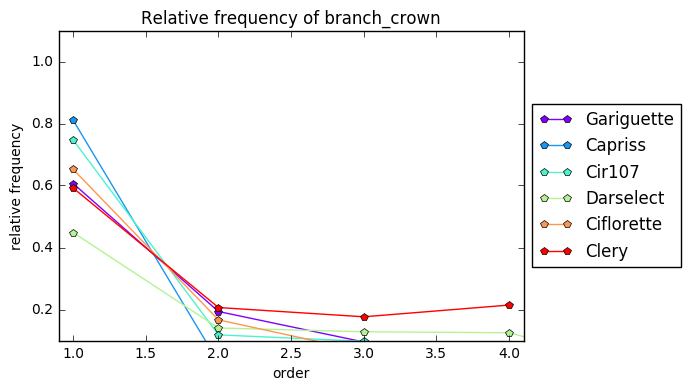

In [29]:
crowntype_distribution(data= All_varieties_extraction_at_module_scale, varieties=["Gariguette","Capriss","Cir107","Darselect","Ciflorette","Clery"],crown_type="branch_crown",expand=0.1)

,,Main,extension_crown,branch_crown
Genotype,order,,,
Capriss,1,0.0,0.189474,0.810526
Capriss,2,0.0,0.970588,0.029412
Capriss,3,0.0,0.967742,0.032258
Capriss,4,0.0,1.000000,0.000000
Ciflorette,1,0.0,0.347826,0.652174
Ciflorette,2,0.0,0.833333,0.166667
Ciflorette,3,0.0,0.935484,0.064516
Ciflorette,4,0.0,1.000000,0.000000
Ciflorette,5,0.0,1.000000,0.000000


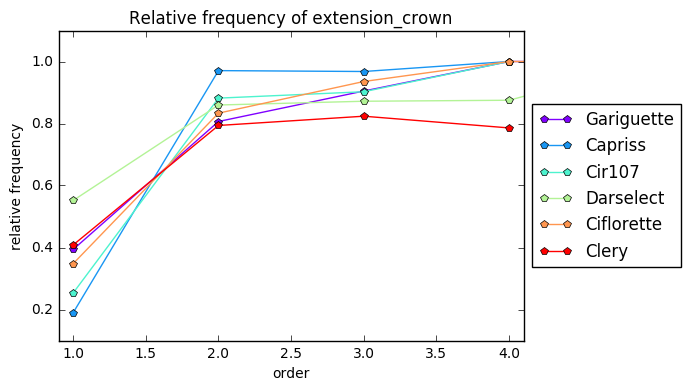

In [30]:
crowntype_distribution(data= All_varieties_extraction_at_module_scale, varieties=["Gariguette","Capriss","Cir107","Darselect","Ciflorette","Clery"],crown_type="extension_crown",expand=0.1,plot=True)

### 3.6 Distribution of complete vs complete module as function of module order 

### 3.6.1 As fonction of module orders

* ** For Gariguette variety**

In [31]:
res=pd.crosstab(index= Gariguette_extraction_at_module_scale["order"], columns= Gariguette_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
order,,
0,0.203704,0.796296
1,0.138298,0.861702
2,0.338710,0.661290
3,0.238095,0.761905
4,0.000000,1.000000
5,0.000000,1.000000


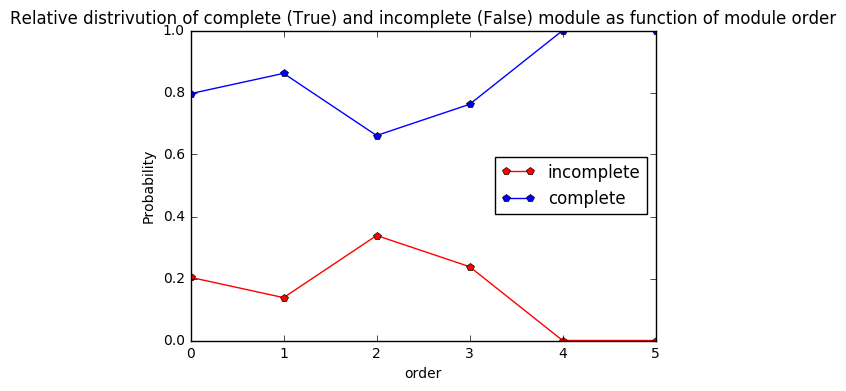

In [32]:
res.plot.line(marker="p", color=["red","blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distrivution of complete (True) and incomplete (False) module as function of module order")

* **For Capriss variety**

In [33]:
res=pd.crosstab(index= Capriss_extraction_at_module_scale["order"], columns= Capriss_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
order,,
0,0.185185,0.814815
1,0.305263,0.694737
2,0.539216,0.460784
3,0.322581,0.677419
4,0.500000,0.500000


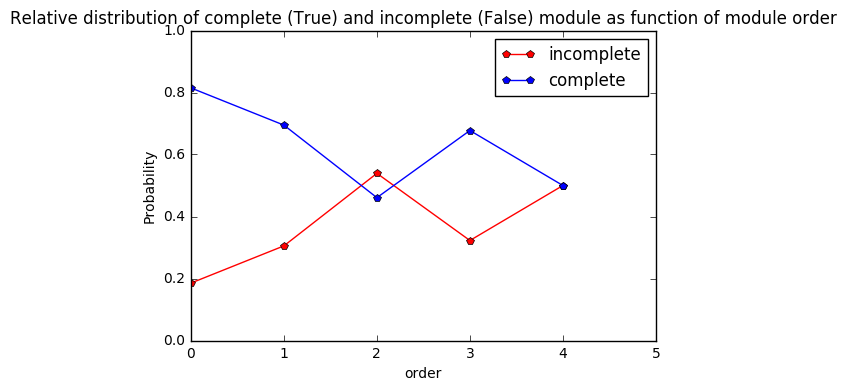

In [34]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of module order")

* **For Darselect variety**

In [35]:
res=pd.crosstab(index= Darselect_extraction_at_module_scale["order"], columns= Darselect_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
order,,
0,0.111111,0.888889
1,0.275862,0.724138
2,0.122807,0.877193
3,0.435897,0.564103
4,0.250000,0.750000
5,0.000000,1.000000


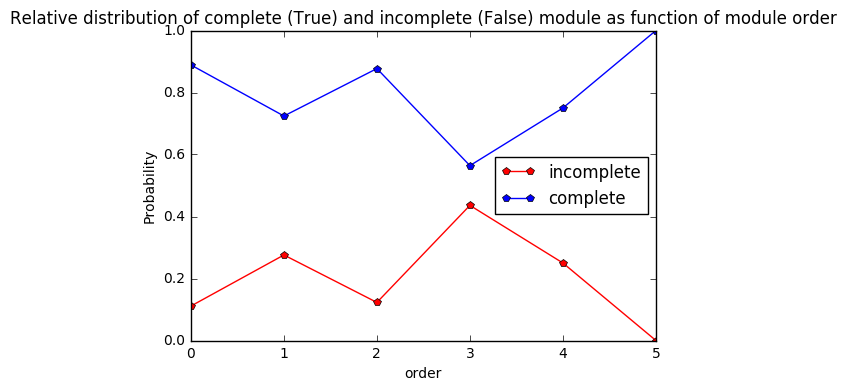

In [36]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of module order")

* **For Cir107 variety**

In [37]:
res=pd.crosstab(index=Cir107_extraction_at_module_scale["order"], columns= Cir107_extraction_at_module_scale["complete_module"],normalize="columns")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
order,,
0,0.088235,0.169811
1,0.343137,0.449057
2,0.431373,0.249057
3,0.117647,0.109434
4,0.019608,0.022642


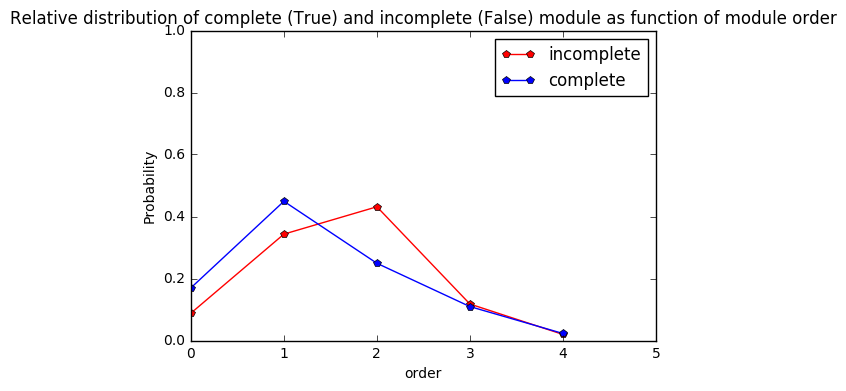

In [38]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of module order")

* **For Ciflorette variety**

In [39]:
res=pd.crosstab(index=Ciflorette_extraction_at_module_scale["order"], columns= Ciflorette_extraction_at_module_scale["complete_module"],normalize="columns")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
order,,
0,0.109375,0.200855
1,0.250000,0.423077
2,0.500000,0.196581
3,0.046875,0.119658
4,0.062500,0.055556
5,0.031250,0.004274


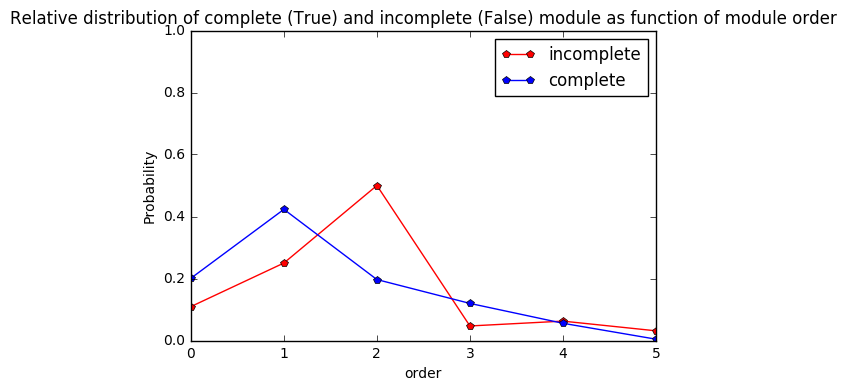

In [40]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of module order")

* **For Clery variety**

In [41]:
res=pd.crosstab(index=Clery_extraction_at_module_scale["order"], columns= Clery_extraction_at_module_scale["complete_module"],normalize="columns")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
order,,
0,0.145161,0.223881
1,0.274194,0.402985
2,0.370968,0.199005
3,0.129032,0.129353
4,0.080645,0.044776


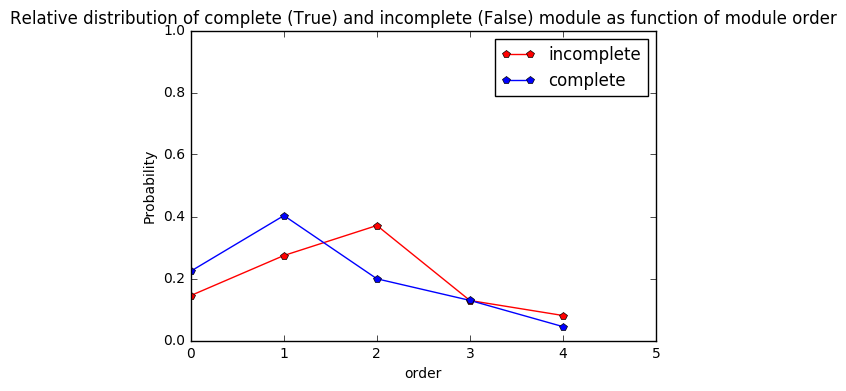

In [42]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of module order")

### 3.6.2 As fonction of date

* ** Gariguette**

In [43]:
res=pd.crosstab(index=Gariguette_extraction_at_module_scale["date"], columns= Gariguette_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
date,,
2014/12/10,1.000000,0.000000
2015/01/08,0.562500,0.437500
2015/02/12,0.121212,0.878788
2015/03/06,0.210526,0.789474
2015/04/02,0.257576,0.742424
2015/05/19,0.037975,0.962025


C:\Users\mlabadie\Miniconda2\envs\openalea\lib\site-packages\pandas\core\indexes\base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


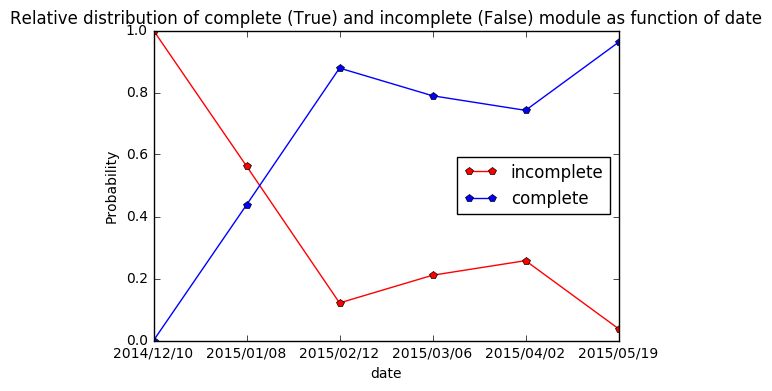

In [44]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of date")

* **Capriss**

In [45]:
res=pd.crosstab(index=Capriss_extraction_at_module_scale["date"], columns= Capriss_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
date,,
2014/12/10,1.000000,0.000000
2015/01/07,0.735294,0.264706
2015/02/15,0.388889,0.611111
2015/03/02,0.476923,0.523077
2015/04/03,0.362637,0.637363
2015/05/27,0.111111,0.888889


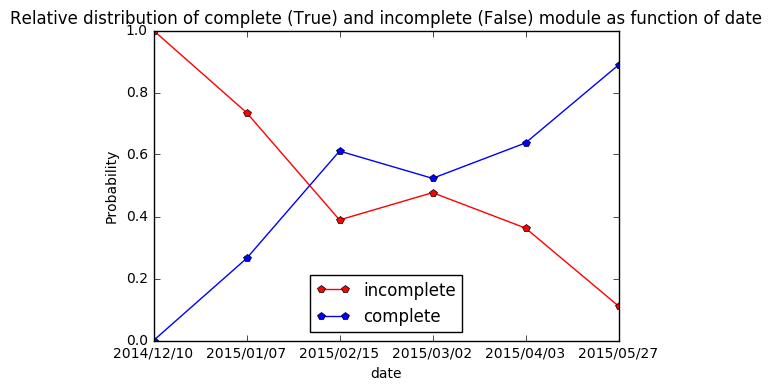

In [46]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of date")

* **Darselect**

In [47]:
res=pd.crosstab(index=Capriss_extraction_at_module_scale["date"], columns= Capriss_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
date,,
2014/12/10,1.000000,0.000000
2015/01/07,0.735294,0.264706
2015/02/15,0.388889,0.611111
2015/03/02,0.476923,0.523077
2015/04/03,0.362637,0.637363
2015/05/27,0.111111,0.888889


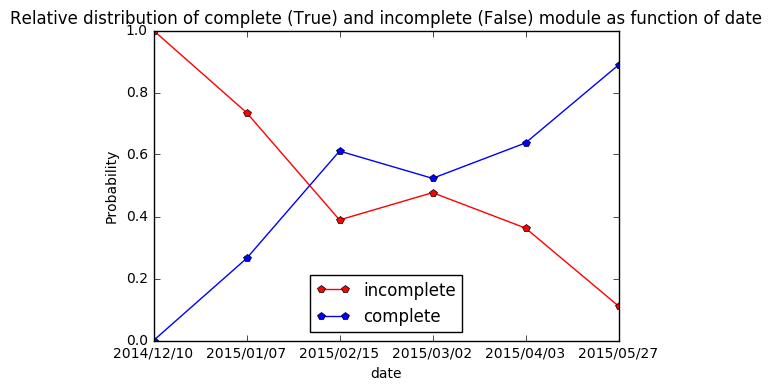

In [48]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of date")

* **Cir107**

In [49]:
res=pd.crosstab(index=Cir107_extraction_at_module_scale["date"], columns= Cir107_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
date,,
2014/12/10,0.928571,0.071429
2015/01/08,0.482759,0.517241
2015/02/11,0.263158,0.736842
2015/03/04,0.397260,0.602740
2015/04/02,0.272727,0.727273
2015/05/20,0.085470,0.914530


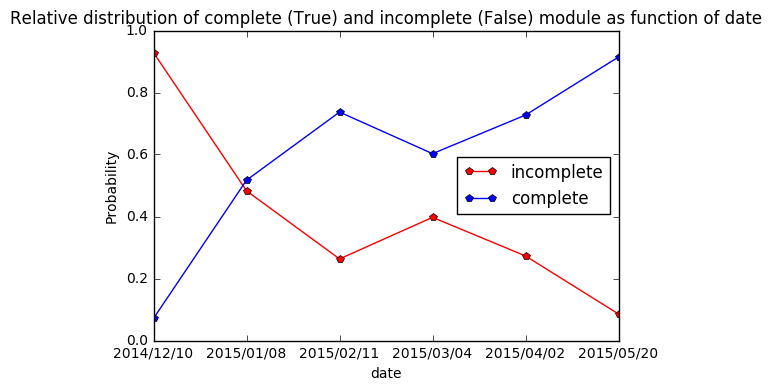

In [50]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of date")

* **Ciflorette**

In [51]:
res=pd.crosstab(index=Ciflorette_extraction_at_module_scale["date"], columns= Ciflorette_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
date,,
2014/12/04,0.846154,0.153846
2015/01/07,0.285714,0.714286
2015/02/13,0.152174,0.847826
2015/03/02,0.320000,0.680000
2015/03/30,0.279412,0.720588
2015/05/27,0.065421,0.934579


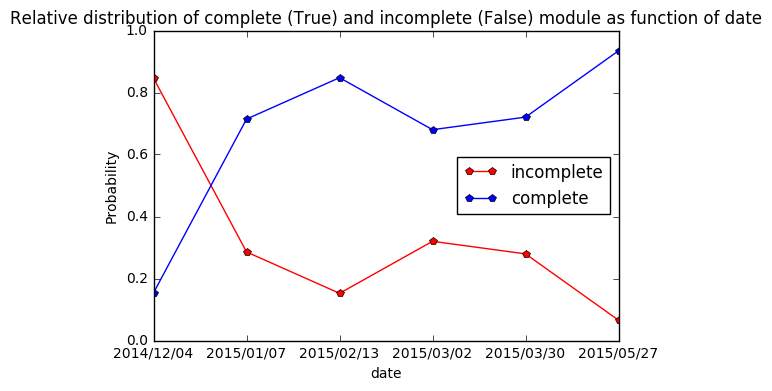

In [52]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of date")

* **Clery**

In [53]:
res=pd.crosstab(index=Clery_extraction_at_module_scale["date"], columns= Clery_extraction_at_module_scale["complete_module"],normalize="index")
res.columns = ["incomplete","complete"]
res

,incomplete,complete
date,,
2014/12/10,0.818182,0.181818
2015/01/07,0.526316,0.473684
2015/02/15,0.137931,0.862069
2015/03/02,0.210526,0.789474
2015/04/03,0.276923,0.723077
2015/05/27,0.128713,0.871287


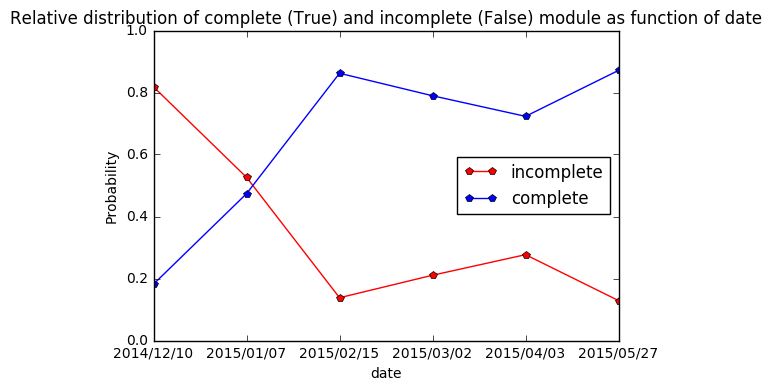

In [54]:
res.plot.line(marker="p",color= ["red", "blue"])
plt.axis([0,5,0,1])
plt.ylabel("Probability")
plt.title("Relative distribution of complete (True) and incomplete (False) module as function of date")